In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Collecting data
texts=pd.read_csv('Data/base_csv_final.csv')
d_titles=texts['Title'].to_dict()
data=pd.read_parquet('Data/info.parquet', engine='pyarrow')
#l_data=[v for k, v in pd.read_parquet('Data/summary.parquet', engine='pyarrow').groupby('Id')]+[v for k, v in pd.read_parquet('Data/summary_2.parquet', engine='pyarrow').groupby('Id')]

In [26]:
#mean number of words
np.mean([len(df) for df in l_data])

np.float64(4841.666666666667)

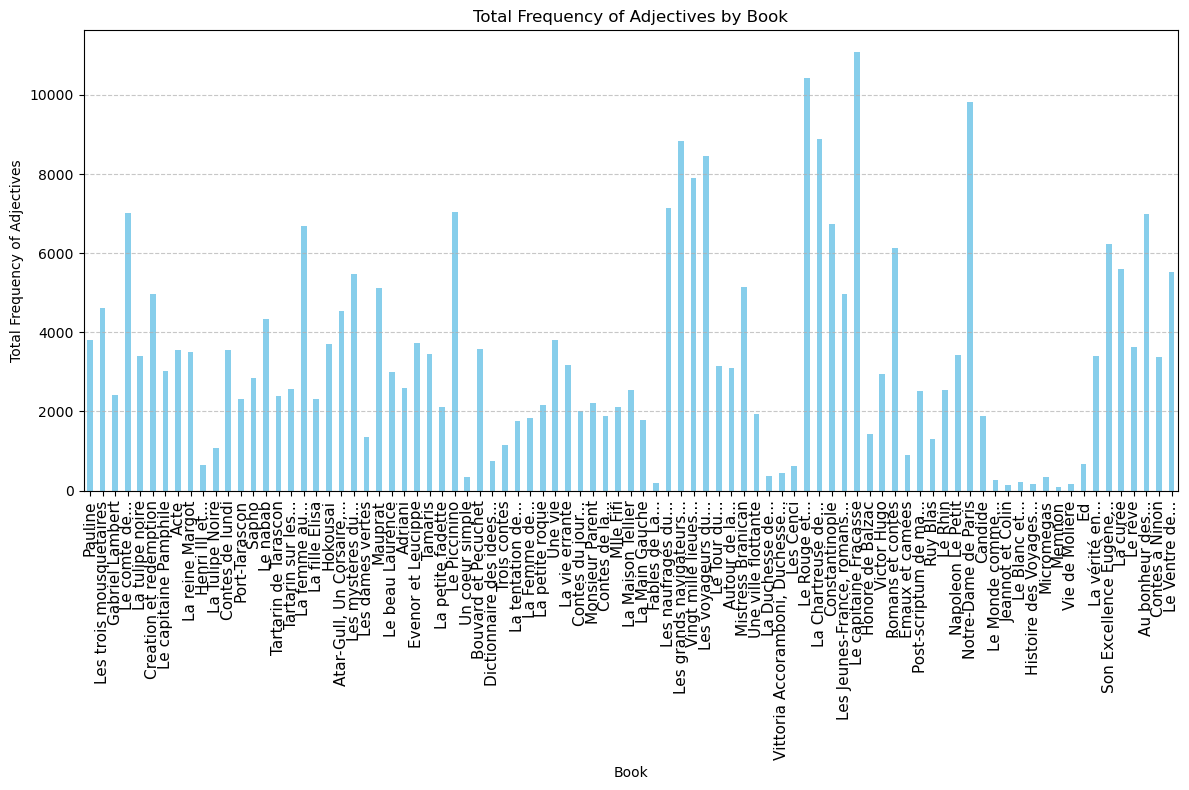

In [ ]:
# Step 1: Combine the dataframes into a single dataframe
# Assuming each dataframe has columns: 'word', 'type', 'frequency'
#combined_df = pd.concat(l_data, ignore_index=True)

# Step 2: Filter the combined dataframe to only include adjectives
# Assuming the 'type' column indicates the word type (e.g., 'ADJ' for adjectives)
adjectives_df = data[data['Type'] == 'adj']

# Step 3: Sum the frequency of adjectives for each book
# Assuming each dataframe has a 'book' column that identifies the book
# If not, you can add a column to each dataframe identifying the book before concatenation
adjectives_by_book = adjectives_df.groupby('Id')['Freq'].sum()
adjectives_dict = {
    ' '.join(d_titles.get(book_id, book_id).split()[:3]) + ('...' if len(d_titles.get(book_id, book_id).split()) > 3 else ''): freq
    for book_id, freq in adjectives_by_book.items()
}


# Step 4: Plot the results
plt.figure(figsize=(12, 8))
x_positions = np.arange(len(adjectives_dict))*2
plt.bar(x_positions, list(adjectives_dict.values()), color='skyblue', width=0.9)
#adjectives_by_book.sort_values().plot(kind='bar', color='skyblue')
#adjectives_dict = {d_titles.get(book_id, book_id): freq for book_id, freq in adjectives_by_book.items()}
#plt.bar(adjectives_dict.keys(), adjectives_dict.values(), color='skyblue')

plt.title('Total Frequency of Adjectives by Book')
plt.xlabel('Book')
plt.ylabel('Total Frequency of Adjectives')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajouter des ticks sur l'axe Y pour plus d'intervalles
# Définir les positions des ticks de l'axe Y
#plt.yticks(np.arange(0, max(adjectives_dict.values()) + 1, step=2))  # Change step size for more intervals

plt.xlim(min(x_positions) - 1, max(x_positions) + 1)
plt.xticks(x_positions, list(adjectives_dict.keys()), rotation=90, ha='center', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


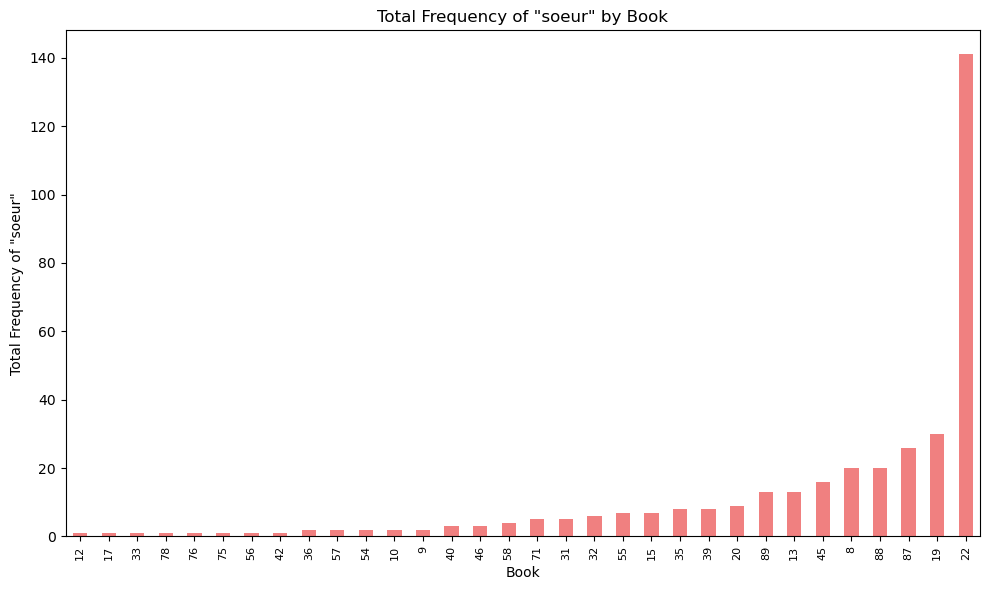

In [124]:
combined_df = pd.concat(l_data, ignore_index=True)

# Step 2: Filter the combined dataframe to only include the word "beautiful"
word_of_interest = "soeur"
word_df = combined_df[combined_df['Word'] == word_of_interest]

# Step 3: Sum the frequency of the word for each book
frequency_by_book = word_df.groupby('Id')['Count'].sum()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
frequency_by_book.sort_values().plot(kind='bar', color='lightcoral')

# Customizing the plot
plt.title(f'Total Frequency of "{word_of_interest}" by Book')
plt.xlabel('Book')
plt.ylabel(f'Total Frequency of "{word_of_interest}"')
plt.xticks(rotation=90, ha='center',fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


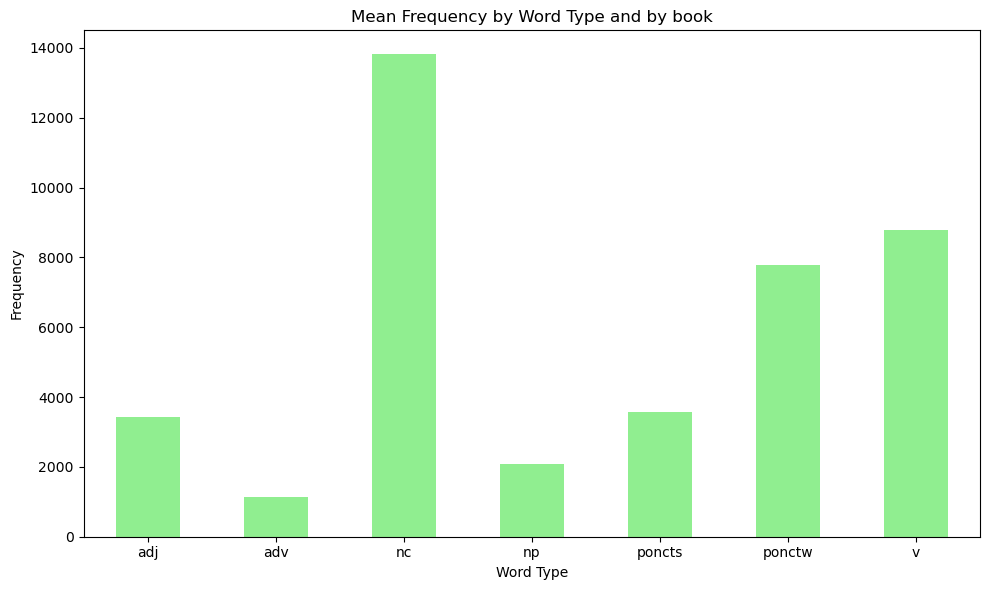

In [31]:
#Somme des fréquences par livre et type
df_stats = data.groupby(['Id', 'Type'])['Freq'].sum().reset_index()
#Récupération des moyenns par type
df_stats = df_stats.groupby('Type')['Freq'].mean()

#Liste des principeaux types de mots
l_included = ['nc', 'v', 'adj', 'np', 'adv', 'ponctw','poncts']  # Example: Only keep noun, verb, adjective, pronoun, adverb types

# Filter to keep only the types you want in the plot
df_filtered = df_stats[df_stats.index.isin(l_included)]

# Step 3: Plot the results
df_filtered.plot(kind='bar', figsize=(10, 6), color=['lightgreen'])

# Customizing the plot
plt.title('Mean Frequency by Word Type and by book')
plt.xlabel('Word Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

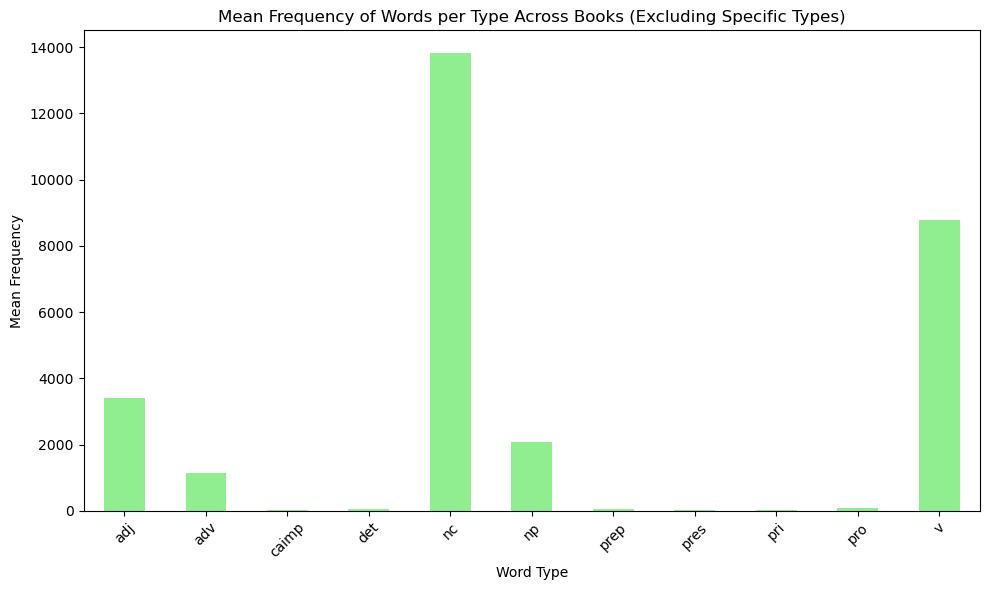

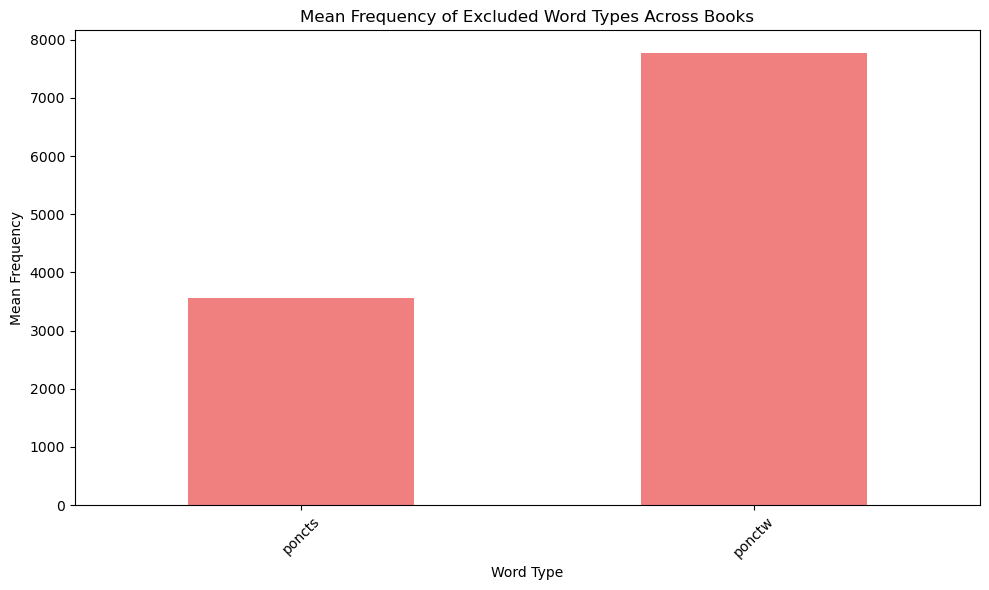

In [24]:
df_book_type_freq = data.groupby(['Id', 'Type'])['Freq'].sum().reset_index()

# Step 2: Calculate the mean frequency per type across all books
df_stats = df_book_type_freq.groupby('Type')['Freq'].mean()

# Exclude specific types for the main plot
l_excluded = ['ponctw', 'poncts','advneg','coo','csu','adjPref','epsilon','parento','parentf']

# Filter out the types you want to exclude from the main plot
df_filtered = df_stats[~df_stats.index.isin(l_excluded)]

# Filter out the excluded types for separate plotting (e.g., punctuations)
df_punct = df_stats[df_stats.index.isin(['ponctw', 'poncts'])]

# Step 3: Plot the results (Mean Frequency of Words per Type)
df_filtered.plot(kind='bar', figsize=(10, 6), color=['lightgreen'])

# Customizing the plot
plt.title('Mean Frequency of Words per Type Across Books (Excluding Specific Types)')
plt.xlabel('Word Type')
plt.ylabel('Mean Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for non-excluded types
plt.show()

# Step 4: Plot the excluded types separately (like punctuations)
df_punct.plot(kind='bar', color=['lightcoral'], figsize=(10, 6))

plt.title('Mean Frequency of Excluded Word Types Across Books')
plt.xlabel('Word Type')
plt.ylabel('Mean Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for excluded types
plt.show()

) missing from font(s) DejaVu Sans.37: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.ages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


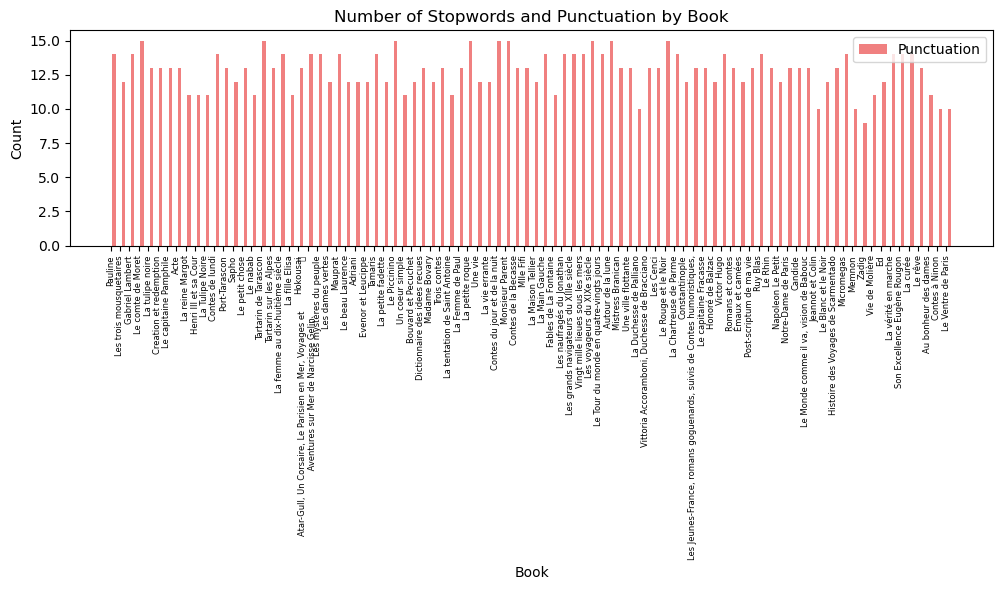

In [87]:
#pb car 47 vide probablement
import spacy
combined_df = pd.concat(l_data, ignore_index=True)

nlp = spacy.load("fr_core_news_sm")  #modèle français
stop_words_fr = nlp.Defaults.stop_words #liste de stopwords fr

# Step 2: Define a function to count stopwords and punctuation
def count_stopwords_punctuation(df, punctuation_types):
    punctuation_count = df[df['Type'].isin(punctuation_types)].shape[0]
    return punctuation_count

# Step 3: Count stopwords and punctuation for each dataframe (book)
punctuation_count = []
books = d_titles.values()

for df in l_data:
    punctuation_count_value = count_stopwords_punctuation(df, ["epsilon","ponctw","poncts","parento","parentf"])
    punctuation_count.append(punctuation_count_value)

# Step 4: Plot the results

# Bar plot for stopwords and punctuation counts
x = range(len(l_data))
width = 0.35  # The width of the bars

plt.figure(figsize=(10, 6))
plt.bar([p + width for p in x], punctuation_count, width, label='Punctuation', color='lightcoral')

# Customizing the plot
plt.title('Number of Stopwords and Punctuation by Book')
plt.xlabel('Book')
plt.ylabel('Count')
plt.xticks(ticks=range(len(books)), labels=books,rotation=90,fontsize=6)  # Position x-ticks at the center of bars
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()


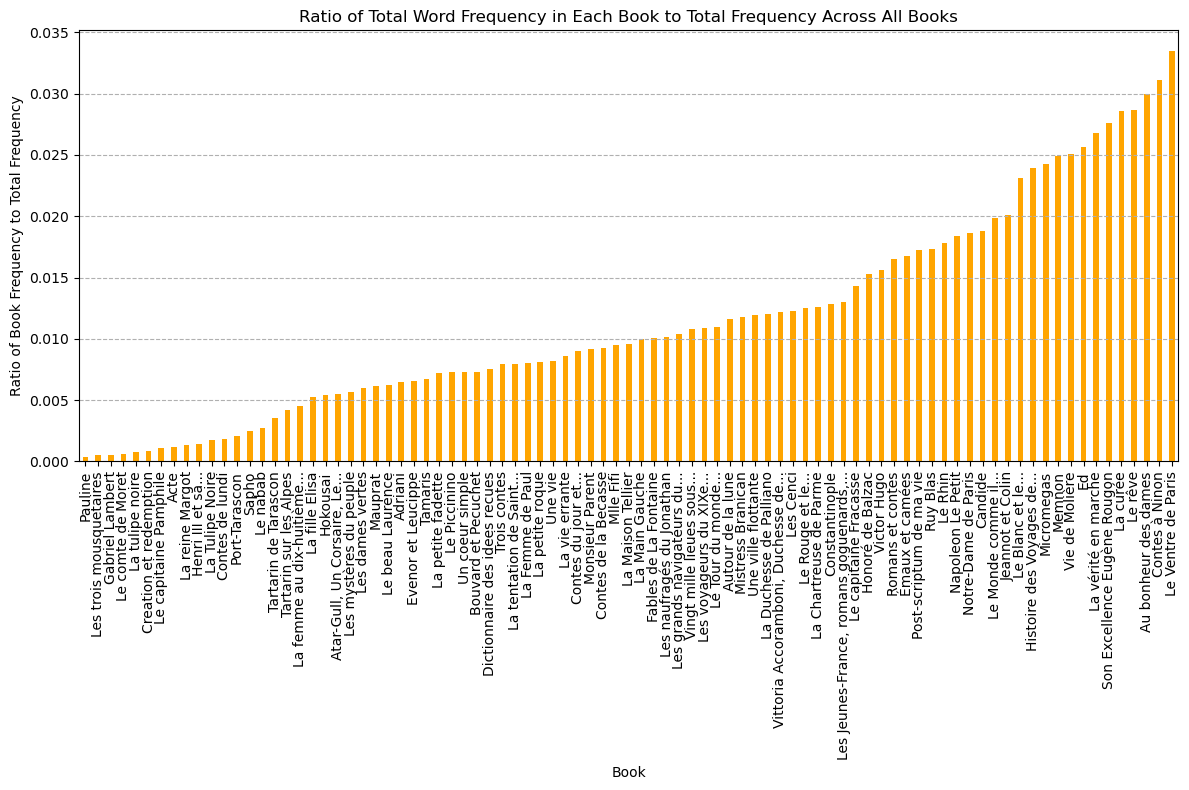

In [85]:
total_frequency = data['Freq'].sum()  # Directly calculate the total frequency from 'data'

word_counts = []  # List to store the word counts (ratios) for each book
book_titles = list(d_titles.values())  # Assuming you have a dictionary of book titles

# Step 2: Calculate the ratio for each book (number of words in each book / total frequency)
# Group by book ID to sum the frequency per book
book_frequency = data.groupby('Id')['Freq'].sum()

# Calculate the ratio for each book (frequency of each book / total frequency)
word_counts = (book_frequency / total_frequency).sort_values()

# Step 3: Plot the ratio data
plt.figure(figsize=(12, 8))

# Using np.arange() to adjust the positions of the bars for spacing
x_positions = np.arange(len(word_counts)) * 2  # Multiply by 2 to increase space between bars

# Plot the bars
plt.bar(x_positions, word_counts, color='orange', width=0.9)

# Customizing the plot
plt.title('Ratio of Total Word Frequency in Each Book to Total Frequency Across All Books')
plt.xlabel('Book')
plt.ylabel('Ratio of Book Frequency to Total Frequency')

# Adjusting x-ticks to show truncated book titles (show first 5 words + '...' if necessary)
plt.xticks(x_positions, [ 
    ' '.join(d_titles.get(book_id, book_id).split()[:4]) + ('...' if len(d_titles.get(book_id, book_id).split()) > 4 else '')
    for book_id in book_frequency.index], rotation=90, ha='center', fontsize=10)

# Adjust the xlim to eliminate unnecessary space on the sides
plt.xlim(min(x_positions) - 1, max(x_positions) + 1)

# Adding horizontal gridlines for easier reading of y-values
plt.grid(True, axis='y', linestyle='--', alpha=1)

# Show the plot
plt.tight_layout()
plt.show()


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


# Step 1: Create a dictionary to store word frequencies for each theme
theme_word_freq = defaultdict(lambda: defaultdict(int))

# Set the types of words you want to exclude (e.g., 'punctuation' and 'stopword')
exclude_types = ["epsilon", "ponctw", "poncts", "parento", "parentf", "np"]

# Step 2: Calculate the total word frequencies across all books to identify the top 20 most frequent words
total_word_freq = defaultdict(int)

# Create a dictionary to track in how many themes each word appears
word_theme_count = defaultdict(int)

# Loop through each book and update the total word frequencies and theme counts
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Ensure that idx is within the bounds of l_data
    if idx < len(l_data):
        book_df = l_data[idx]  # Use the index to get the corresponding book's word frequencies dataframe
        
        # Get the words, frequencies, and types from the respective columns
        words = book_df['Word']
        frequencies = book_df['Count']
        types = book_df['Type']
        
        # Update total word frequency for all words across all books
        for word, freq, word_type in zip(words, frequencies, types):
            if word_type not in exclude_types:  # Only consider valid types
                total_word_freq[word] += freq
                
                # Count in how many themes the word appears
                for theme in themes:
                    word_theme_count[word] += 1

# Step 3: Get the top 20 most frequent words across all books
top_20_words = {word for word, freq in sorted(total_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]}

# Step 4: Identify words that appear in strictly more than 2 themes
exclude_words = {word for word, count in word_theme_count.items() if count > 3}

# Step 5: Calculate word frequencies for each theme across all books, excluding top 20 frequent words and words in more than 2 themes
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Ensure that idx is within the bounds of l_data
    if idx < len(l_data):
        book_df = l_data[idx]  # Use the index to get the corresponding book's word frequencies dataframe
        
        # Get the words, frequencies, and types from the respective columns
        words = book_df['Word']
        frequencies = book_df['Count']
        types = book_df['Type']
        
        # For each theme, add the word frequencies to the theme's frequency dictionary
        for theme in themes:
            for word, freq, word_type in zip(words, frequencies, types):  # Map words, frequencies, and types
                if word_type not in exclude_types and word not in top_20_words and word not in exclude_words:  # Exclude top 20 and words in > 2 themes
                    try:
                        # Ensure freq is a numeric value (convert to int or float if necessary)
                        freq = float(freq)  # Convert freq to float if it's not already a number
                        theme_word_freq[theme][word] += freq
                    except ValueError:
                        # Handle case where freq is not a number (e.g., if it contains a string or NaN)
                        print(f"Warning: Invalid frequency value for word '{word}' in book '{book_title}'")
                        continue
    else:
        print(f"Warning: No corresponding word frequency data for book '{book_title}' (idx={idx})")

# Step 6: Plot the 15 most frequent terms for each theme, excluding top 20 words and words in more than 2 themes
for theme, word_freqs in theme_word_freq.items():
    # Sort words by frequency (descending)
    sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15]
    
    # Prepare data for plotting
    words, freqs = zip(*sorted_words)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color='skyblue')
    plt.title(f"Top 15 Most Frequent Terms for Theme: {theme}")
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

NameError: name 'l_data' is not defined

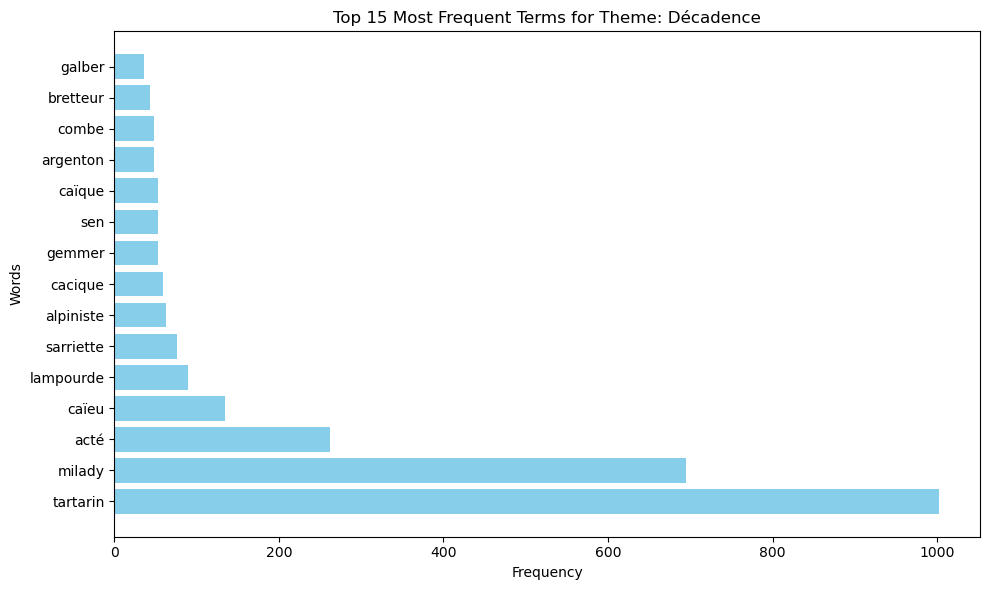

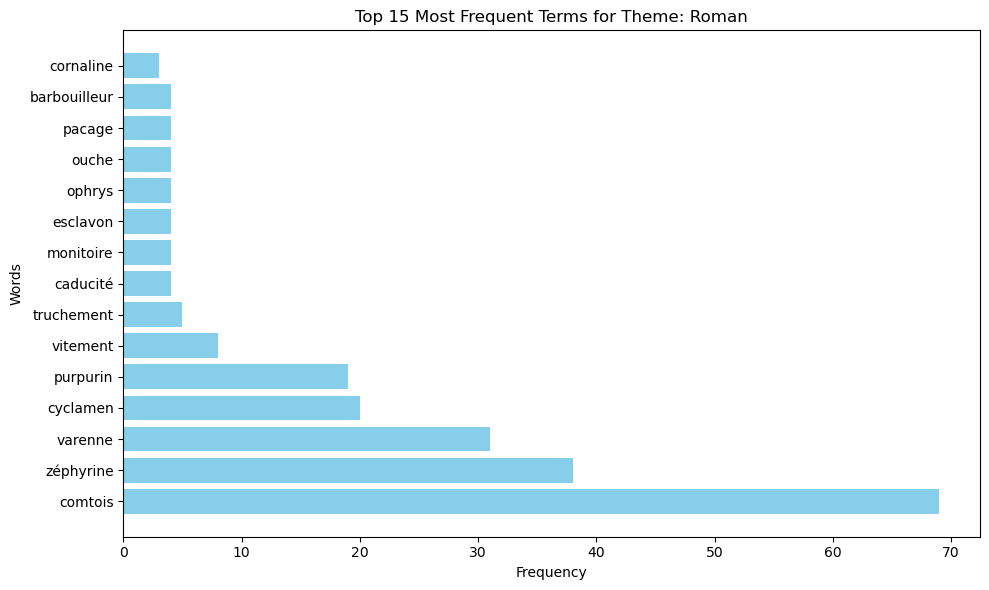

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Create a dictionary to store word frequencies for each theme
theme_word_freq = defaultdict(lambda: defaultdict(int))

# Set the types of words you want to exclude (e.g., 'punctuation' and 'stopword')
exclude_types = ["epsilon", "ponctw", "poncts", "parento", "parentf", "np"]

# Step 2: Calculate the total word frequencies across all books to identify the top 20 most frequent words
total_word_freq = defaultdict(int)

# Create a dictionary to track in how many themes each word appears
word_theme_count = defaultdict(int)

# Step 3: Loop through each book in 'texts' and update the total word frequencies and theme counts
for idx, row in texts.iterrows():
    # Get the book title and themes for the current row
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # Update total word frequency for all words across all books
    for word, freq, word_type in zip(words, frequencies, types):
        if word_type not in exclude_types:  # Only consider valid types
            total_word_freq[word] += freq
            
            # Count in how many themes the word appears
            for theme in themes:
                word_theme_count[word] += 1

# Step 4: Get the top 20 most frequent words across all books
top_20_words = {word for word, freq in sorted(total_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]}

# Step 5: Identify words that appear in strictly more than 2 themes
exclude_words = {word for word, count in word_theme_count.items() if count > 3}

# Step 6: Calculate word frequencies for each theme across all books, excluding top 20 frequent words and words in more than 2 themes
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # For each theme, add the word frequencies to the theme's frequency dictionary
    for theme in themes:
        for word, freq, word_type in zip(words, frequencies, types):  # Map words, frequencies, and types
            if word_type not in exclude_types and word not in top_20_words and word not in exclude_words:  # Exclude top 20 and words in > 2 themes
                try:
                    # Ensure freq is a numeric value (convert to int or float if necessary)
                    freq = float(freq)  # Convert freq to float if it's not already a number
                    theme_word_freq[theme][word] += freq
                except ValueError:
                    # Handle case where freq is not a number (e.g., if it contains a string or NaN)
                    print(f"Warning: Invalid frequency value for word '{word}' in book '{book_title}'")
                    continue

# Step 7: Define the list of themes you want to plot
themes_to_plot = ["Décadence", "Roman", "Coutumes","Société et politique", "Fiction historique"]  # Replace with your actual theme names

# Step 8: Plot the 15 most frequent terms for the specified themes only
for theme, word_freqs in theme_word_freq.items():
    # Check if the theme is in the list of themes to plot
    if theme in themes_to_plot:
        # Sort words by frequency (descending)
        sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15]
        
        # Prepare data for plotting
        words, freqs = zip(*sorted_words)
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(words, freqs, color='skyblue')
        plt.title(f"Top 15 Most Frequent Terms for Theme: {theme}")
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()


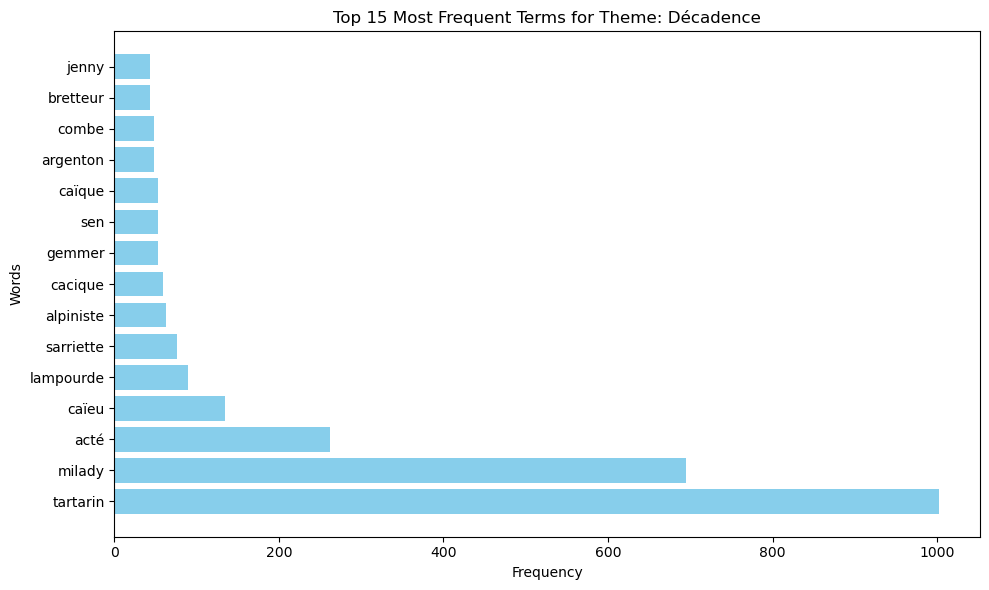

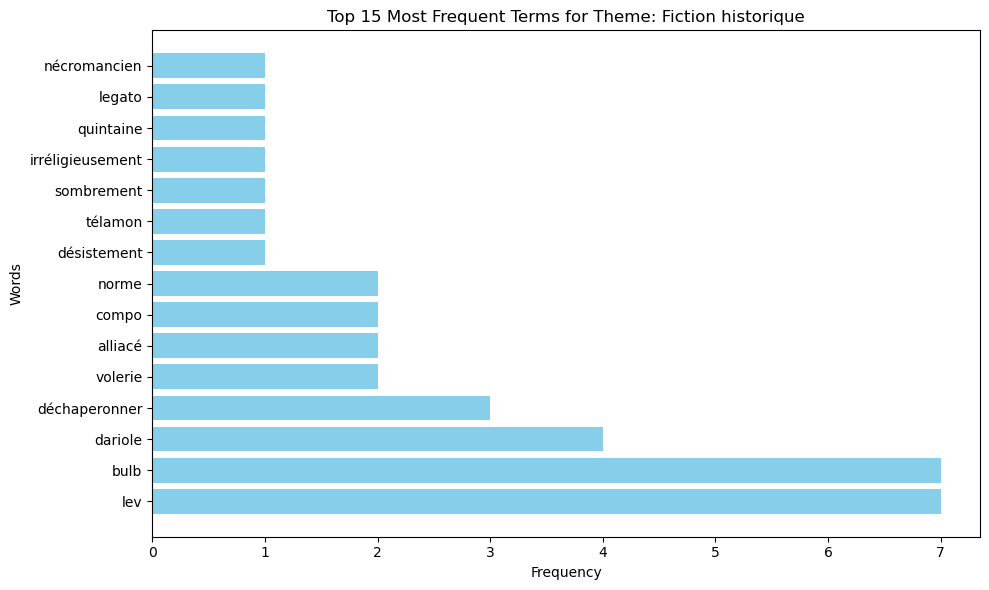

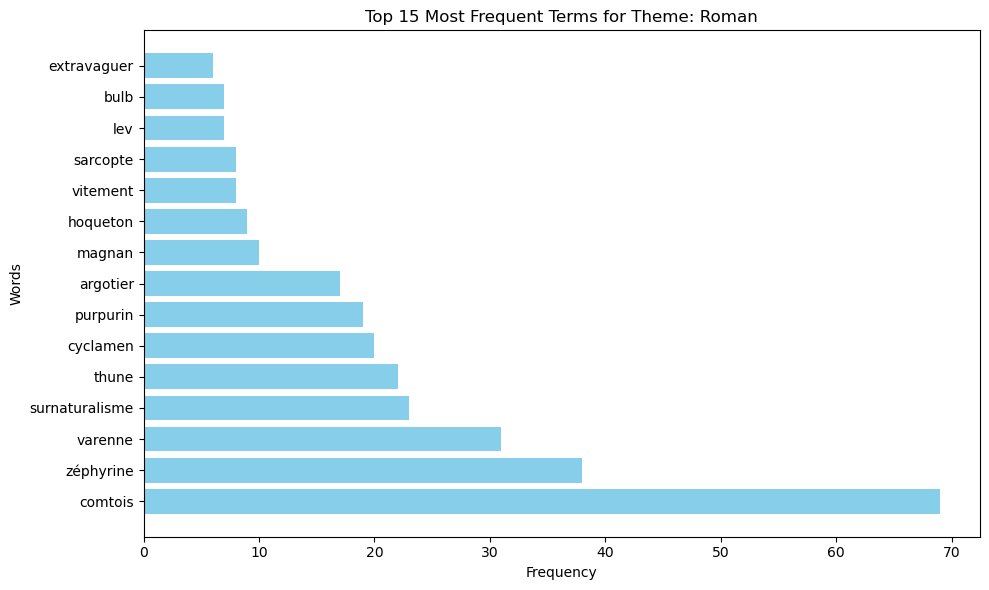

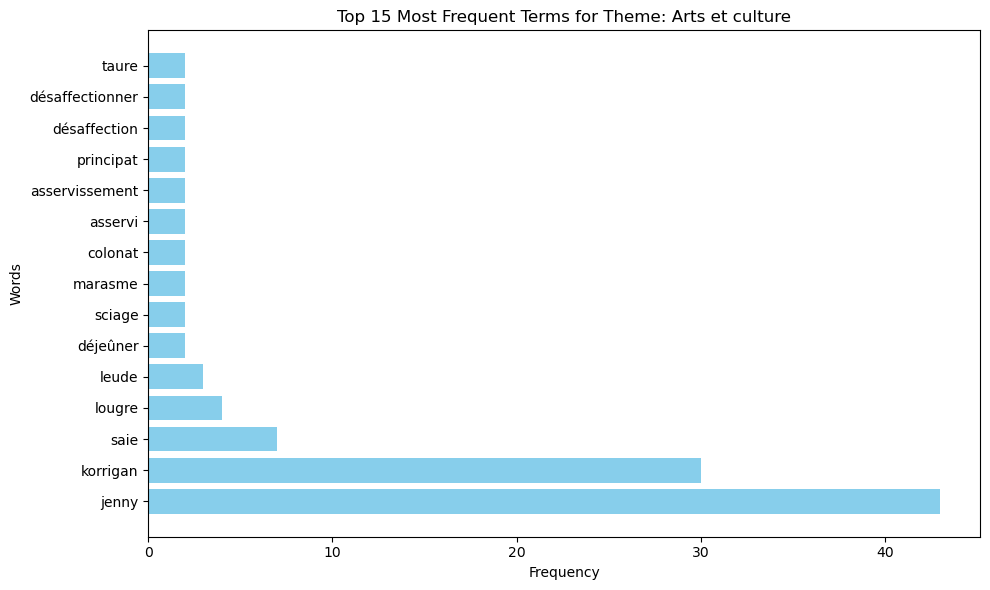

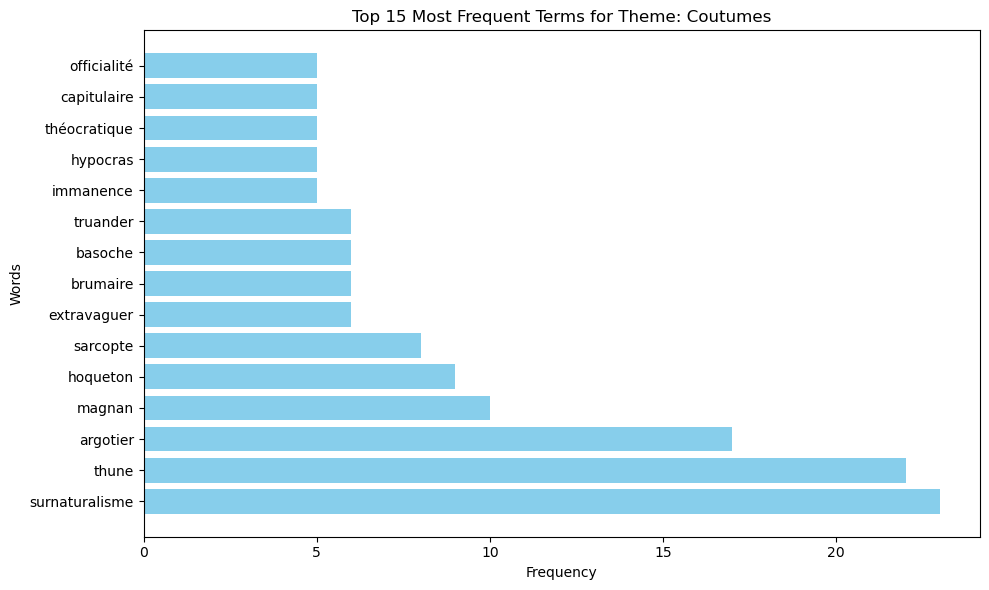

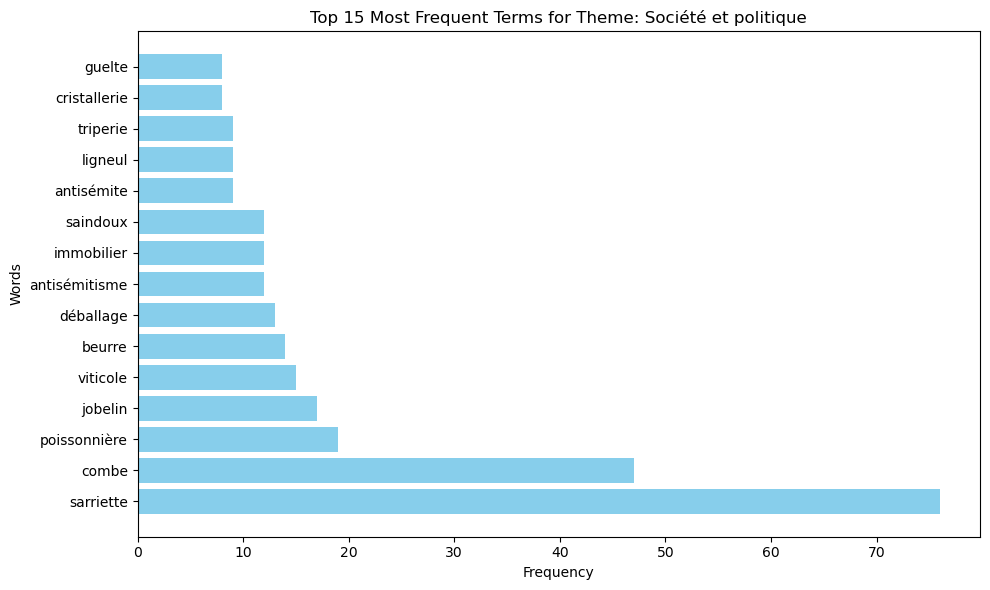

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Create a dictionary to store word frequencies for each theme
theme_word_freq = defaultdict(lambda: defaultdict(int))

# Set the types of words you want to exclude (e.g., 'punctuation' and 'stopword')
exclude_types = ["epsilon", "ponctw", "poncts", "parento", "parentf", "np"]

# Step 2: Calculate the total word frequencies across all books to identify the top 20 most frequent words
total_word_freq = defaultdict(int)

# Create a dictionary to track in how many themes each word appears
word_theme_count = defaultdict(int)

# Step 3: Loop through each book in 'texts' and update the total word frequencies and theme counts
for idx, row in texts.iterrows():
    # Get the book title and themes for the current row
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # Update total word frequency for all words across all books
    for word, freq, word_type in zip(words, frequencies, types):
        if word_type not in exclude_types:  # Only consider valid types
            total_word_freq[word] += freq
            
            # Count in how many themes the word appears
            for theme in themes:
                word_theme_count[word] += 1

# Step 4: Get the top 20 most frequent words across all books
top_20_words = {word for word, freq in sorted(total_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]}

# Step 5: Identify words that appear in strictly more than 2 themes
exclude_words = {word for word, count in word_theme_count.items() if count > 3}

# Step 6: Calculate word frequencies for each theme across all books, excluding top 20 frequent words and words in more than 2 themes
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # For each theme, add the word frequencies to the theme's frequency dictionary
    for theme in themes:
        for word, freq, word_type in zip(words, frequencies, types):  # Map words, frequencies, and types
            if word_type not in exclude_types and word not in top_20_words and word not in exclude_words:  # Exclude top 20 and words in > 2 themes
                try:
                    # Ensure freq is a numeric value (convert to int or float if necessary)
                    freq = float(freq)  # Convert freq to float if it's not already a number
                    theme_word_freq[theme.strip().lower()][word] += freq  # Strip and convert theme to lowercase to avoid duplication
                except ValueError:
                    # Handle case where freq is not a number (e.g., if it contains a string or NaN)
                    print(f"Warning: Invalid frequency value for word '{word}' in book '{book_title}'")
                    continue

# Step 8: Define the list of themes you want to plot (ensure they match exactly)
themes_to_plot = ["Décadence", "Roman", "Coutumes","Société et politique", "Fiction historique","Arts et culture"] # Replace with your actual theme names, make sure they're in lowercase and match exactly
# Step 9: Plot the 15 most frequent terms for the specified themes only
for theme, word_freqs in theme_word_freq.items():
    # Check if the theme is in the list of themes to plot
    if theme in [t.lower() for t in themes_to_plot]:  # Ensure case-insensitive matching
        # Sort words by frequency (descending)
        sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15]
        
        # Prepare data for plotting
        words, freqs = zip(*sorted_words)
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(words, freqs, color='skyblue')
        plt.title(f"Top 15 Most Frequent Terms for Theme: {theme.capitalize()}")
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()


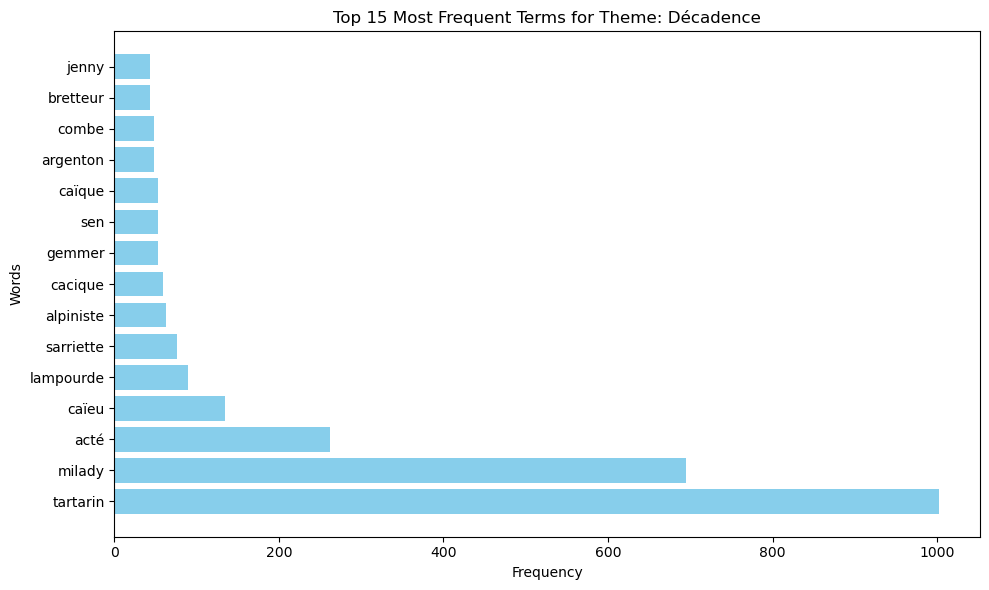

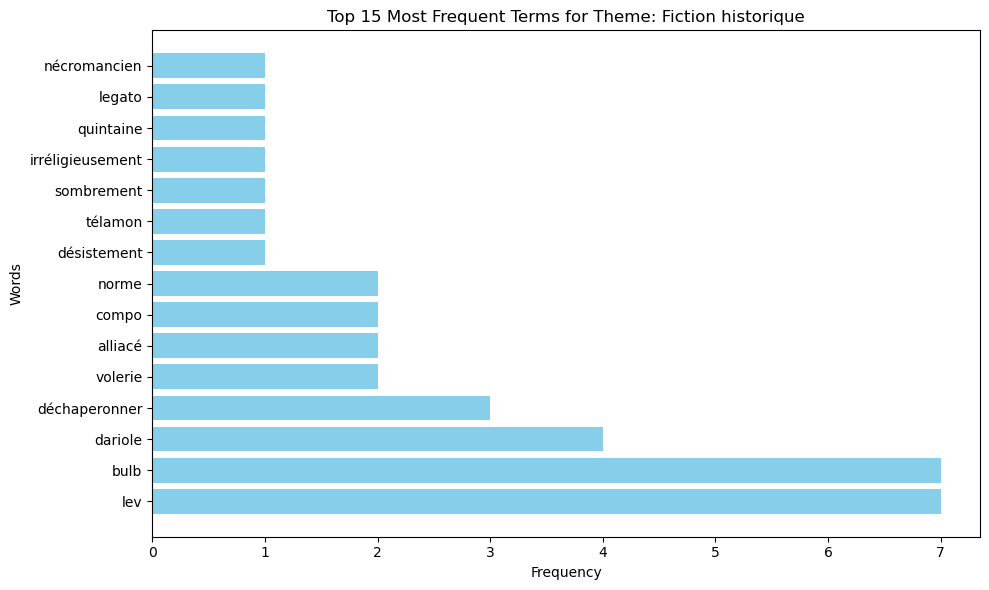

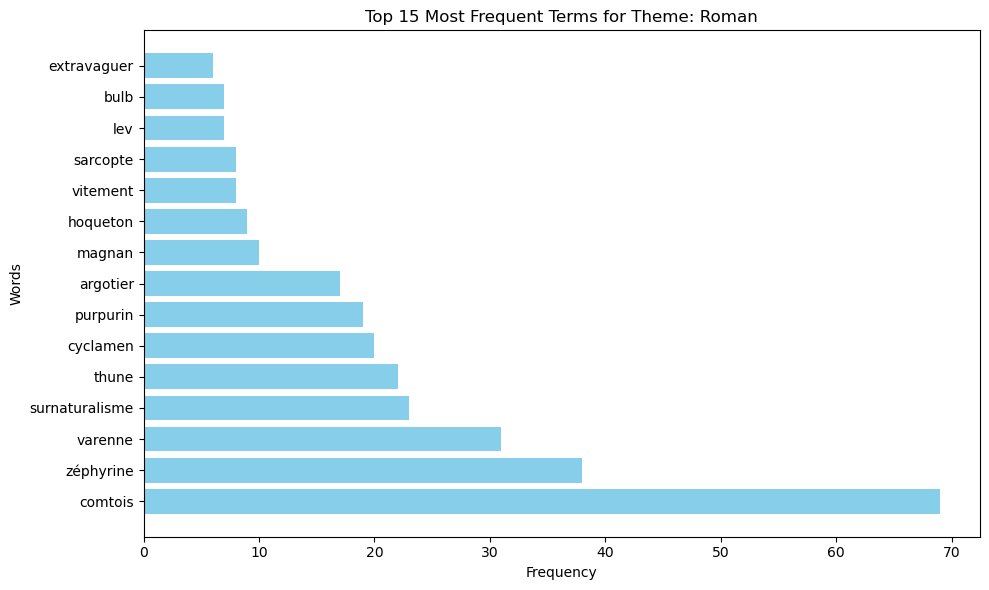

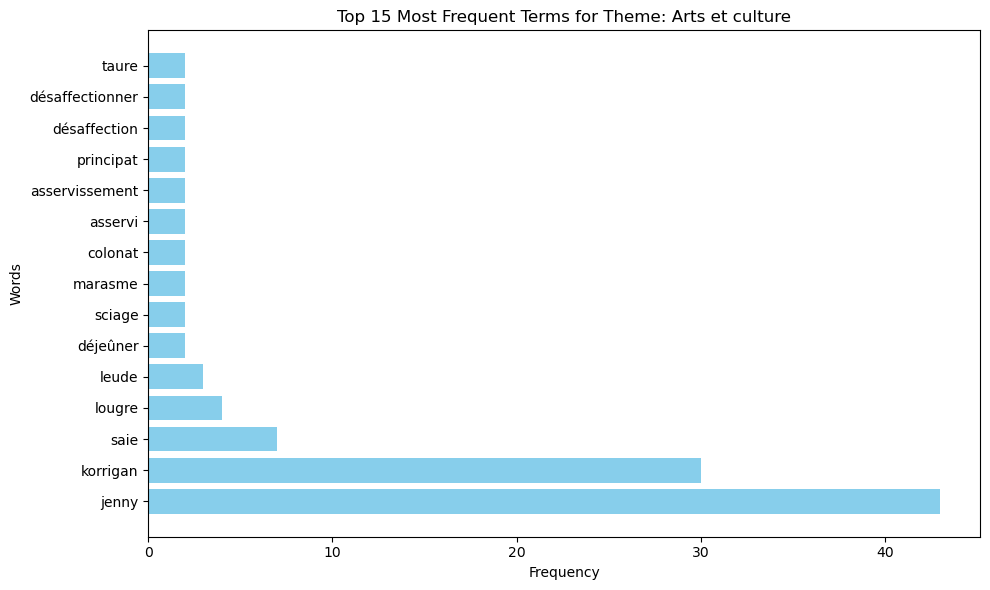

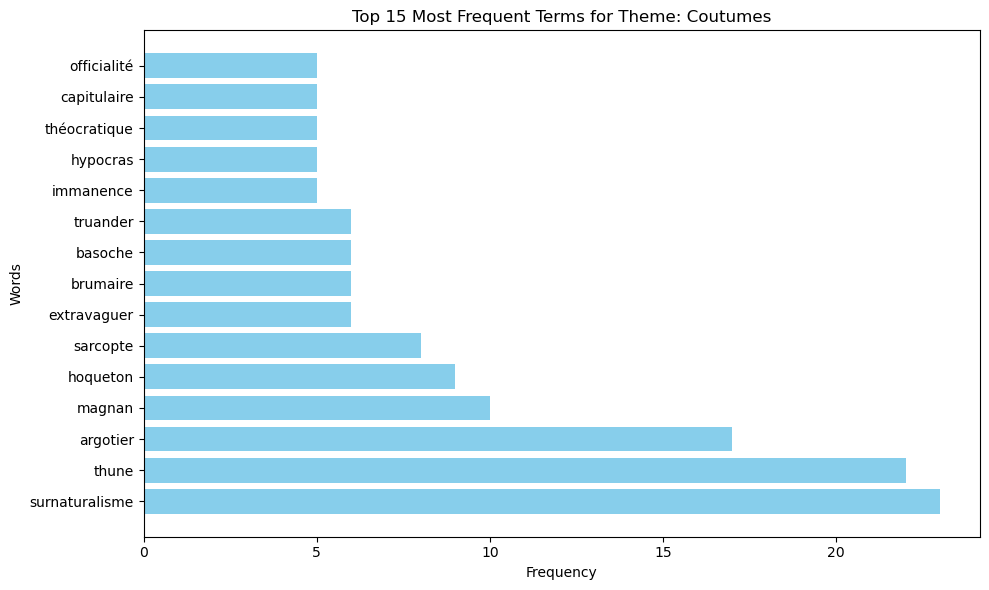

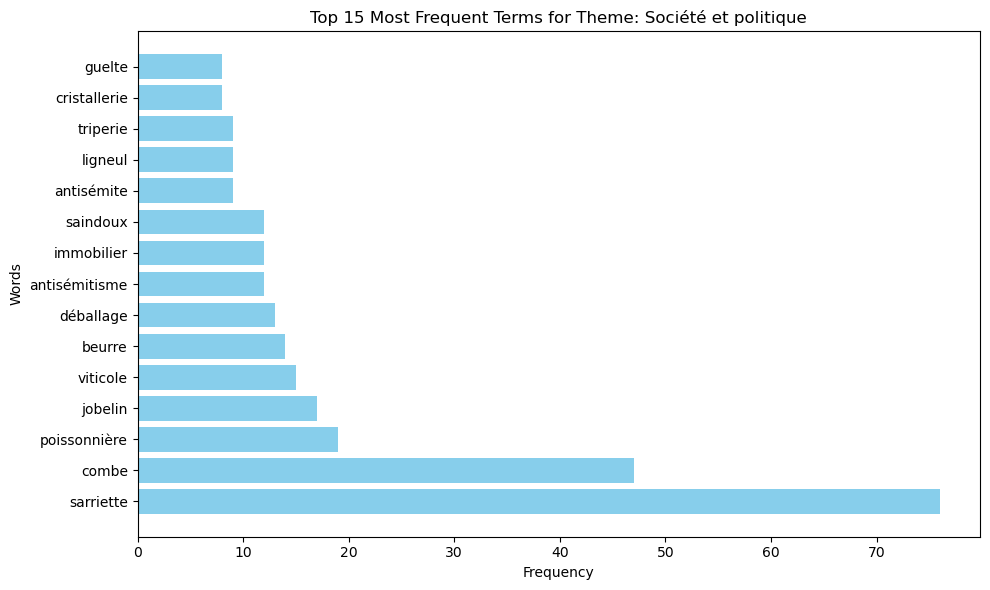

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Create a dictionary to store word frequencies for each theme
theme_word_freq = defaultdict(lambda: defaultdict(int))

# Set the types of words you want to exclude (e.g., 'punctuation' and 'stopword')
exclude_types = ["epsilon", "ponctw", "poncts", "parento", "parentf", "np"]

# Step 2: Calculate the total word frequencies across all books to identify the top 20 most frequent words
total_word_freq = defaultdict(int)

# Create a dictionary to track in how many themes each word appears
word_theme_count = defaultdict(int)

# Step 3: Loop through each book in 'texts' and update the total word frequencies and theme counts
for idx, row in texts.iterrows():
    # Get the book title and themes for the current row
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # Update total word frequency for all words across all books
    for word, freq, word_type in zip(words, frequencies, types):
        if word_type not in exclude_types:  # Only consider valid types
            total_word_freq[word] += freq
            
            # Count in how many themes the word appears
            for theme in themes:
                word_theme_count[word] += 1

# Step 4: Get the top 20 most frequent words across all books
top_20_words = {word for word, freq in sorted(total_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]}

# Step 5: Identify words that appear in strictly more than 2 themes
exclude_words = {word for word, count in word_theme_count.items() if count > 3}

# Step 6: Calculate word frequencies for each theme across all books, excluding top 20 frequent words and words in more than 2 themes
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book Id from the current row (idx)
    book_id = idx  # 'idx' is the row number in texts, which corresponds to the 'Id' in data
    
    # Filter the 'data' dataframe using the book Id
    book_df = data[data['Id'] == book_id]
    
    # Get the words, frequencies, and types from the respective columns
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # For each theme, add the word frequencies to the theme's frequency dictionary
    for theme in themes:
        for word, freq, word_type in zip(words, frequencies, types):  # Map words, frequencies, and types
            if word_type not in exclude_types and word not in top_20_words and word not in exclude_words:  # Exclude top 20 and words in > 2 themes
                # Directly convert freq to float (removing the try-except block)
                freq = float(freq)  # Convert freq to float if it's not already a number
                theme_word_freq[theme.strip().lower()][word] += freq  # Strip and convert theme to lowercase to avoid duplication

# Step 8: Define the list of themes you want to plot (ensure they match exactly)
themes_to_plot = ["Décadence", "Roman", "Coutumes","Société et politique", "Fiction historique","Arts et culture"] # Replace with your actual theme names, make sure they're in lowercase and match exactly

# Step 9: Plot the 15 most frequent terms for the specified themes only
for theme, word_freqs in theme_word_freq.items():
    # Check if the theme is in the list of themes to plot
    if theme in [t.lower() for t in themes_to_plot]:  # Ensure case-insensitive matching
        # Sort words by frequency (descending)
        sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15]
        
        # Prepare data for plotting
        words, freqs = zip(*sorted_words)
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(words, freqs, color='skyblue')
        plt.title(f"Top 15 Most Frequent Terms for Theme: {theme.capitalize()}")
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()


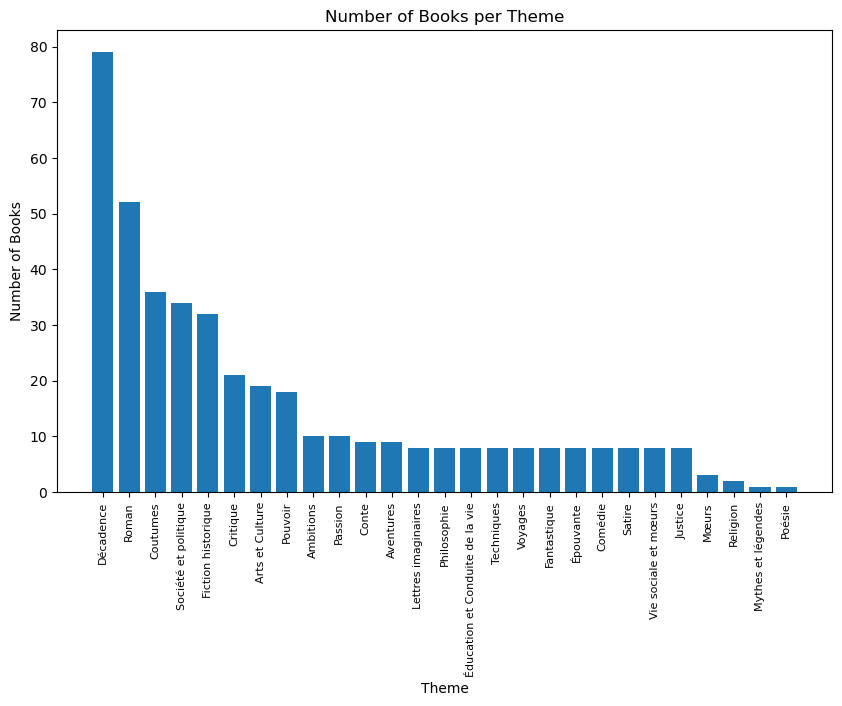

In [9]:
texts['Themes'] = texts['Themes'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

theme_exploded = texts.explode("Themes")

# Counting the number of books per theme
theme_counts = theme_exploded['Themes'].value_counts()

# Convert to DataFrame for easier plotting
theme_counts_df = theme_counts.reset_index()
theme_counts_df.columns = ['Theme', 'Number of Books']

# Plotting the number of books per theme
plt.figure(figsize=(10, 6))
plt.bar(theme_counts_df['Theme'], theme_counts_df['Number of Books'])
plt.xlabel('Theme')
plt.ylabel('Number of Books')
plt.title('Number of Books per Theme')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming l_data is a list of DataFrames where each DataFrame contains words and frequencies
# Combine all DataFrames in the list into one DataFrame
combined_df = pd.concat(l_data, ignore_index=True)

# Combine all the words into a single string
all_words = " ".join(combined_df['Word'].astype(str))

# Create a word cloud from the combined words
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='inferno').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of All Words in the Books')
plt.show()


NameError: name 'l_data' is not defined

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Create a dictionary to store word frequencies for each theme
theme_word_freq = defaultdict(lambda: defaultdict(int))

# Set the types of words you want to exclude (e.g., 'punctuation' and 'stopword')
exclude_types = ["epsilon", "ponctw", "poncts", "parento", "parentf", "np"]

# Step 2: Calculate the total word frequencies across all books to identify the top 20 most frequent words
total_word_freq = defaultdict(int)

# Create a dictionary to track in how many themes each word appears
word_theme_count = defaultdict(int)

# Loop through each row in `texts` to update the total word frequencies and theme counts
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book's word frequencies dataframe from `data` using the book ID
    # Assuming 'Id' is a common identifier between `texts` and `data`
    book_df = data[data['Id'] == row['Id']]  # Linking by 'Id'
    
    # Get the words, frequencies, and types from the respective columns in `data`
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # Update total word frequency for all words across all books
    for word, freq, word_type in zip(words, frequencies, types):
        if word_type not in exclude_types:  # Only consider valid types
            total_word_freq[word] += freq
            
            # Count in how many themes the word appears
            for theme in themes:
                word_theme_count[word] += 1

# Step 3: Get the top 20 most frequent words across all books
top_20_words = {word for word, freq in sorted(total_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]}

# Step 4: Identify words that appear in strictly more than 2 themes
exclude_words = {word for word, count in word_theme_count.items() if count > 3}

# Step 5: Calculate word frequencies for each theme across all books, excluding top 20 frequent words and words in more than 2 themes
for idx, row in texts.iterrows():
    book_title = row['Title']
    themes = row['Themes'].split(",")
    
    # Get the corresponding book's word frequencies dataframe from `data` using the book ID
    book_df = data[data['Id'] == row['Id']]  # Linking by 'Id'
    
    # Get the words, frequencies, and types from the respective columns in `data`
    words = book_df['Word']
    frequencies = book_df['Freq']
    types = book_df['Type']
    
    # For each theme, add the word frequencies to the theme's frequency dictionary
    for theme in themes:
        for word, freq, word_type in zip(words, frequencies, types):  # Map words, frequencies, and types
            if word_type not in exclude_types and word not in top_20_words and word not in exclude_words:  # Exclude top 20 and words in > 2 themes
                try:
                    # Ensure freq is a numeric value (convert to int or float if necessary)
                    freq = float(freq)  # Convert freq to float if it's not already a number
                    theme_word_freq[theme][word] += freq
                except ValueError:
                    # Handle case where freq is not a number (e.g., if it contains a string or NaN)
                    print(f"Warning: Invalid frequency value for word '{word}' in book '{book_title}'")
                    continue

# Step 6: Plot the 15 most frequent terms for each theme, excluding top 20 words and words in more than 2 themes
for theme, word_freqs in theme_word_freq.items():
    # Sort words by frequency (descending)
    sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:15]
    
    # Prepare data for plotting
    words, freqs = zip(*sorted_words)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color='skyblue')
    plt.title(f"Top 15 Most Frequent Terms for Theme: {theme}")
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()


KeyError: 'Id'